In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 


def viz(DIR, save_dir=None):
    
    if save_dir is None:
        save_dir = os.path.join('Output', DIR)
    file = list(sorted(glob.glob(os.path.join('Output', DIR, 'results_withInput**.csv'))))[-1]
    ts = file.split('.csv')[0].split('_')[-1]
    fpath = os.path.join(save_dir, 'output_{}.png'.format(ts)) 
    df = pd.read_csv(file, index_col=None)
    
    file = list(sorted(glob.glob(os.path.join('Output', DIR, 'results_noInput**.csv'))))[-1]
    df_ni = pd.read_csv(file, index_col=None)
    

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[16,10])
    sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":12})   

    fig.suptitle(' Precision@Next top k[10,20,30,40,50] ; Recall till reaching 1.0 || {}'.format(DIR), fontsize=15)
    i = 0
    j = 0
    for y_col in ['Prec@next_' + str(_) for _ in [10,20,30,40,50]]:
        sns.set_style("whitegrid")
        plt.ylim(0, 1.0)
        axs[i][j].set(ylim=(0, 1.0))
        g = sns.lineplot(data=df, x="idx", y=y_col, markers=True,  ax=axs[i][j])
        g.axhline(0.5,color='r',label='E(precision) , no input')
        axs[i][j].set(xlabel='Batch')
        
        j+=1
        if j > 2: 
            j = 0
            i+= 1

    # Recall
    plt.ylim(0, 1.0)
    y_col = 'recall'
    sns.lineplot(data=df, x="idx", y=y_col, markers=True,  ax=axs[i][j], color='g', label='Input provided')
    sns.lineplot(data=df_ni, x="idx", y=y_col, markers=True,  ax=axs[i][j],color='b',label='No Input provided')
    
    axs[i][j].set(xlabel='Batch', ylabel='Recall')
    
    plt.tight_layout()
    plt.savefig(fpath)
    plt.show()
    plt.close()
    return


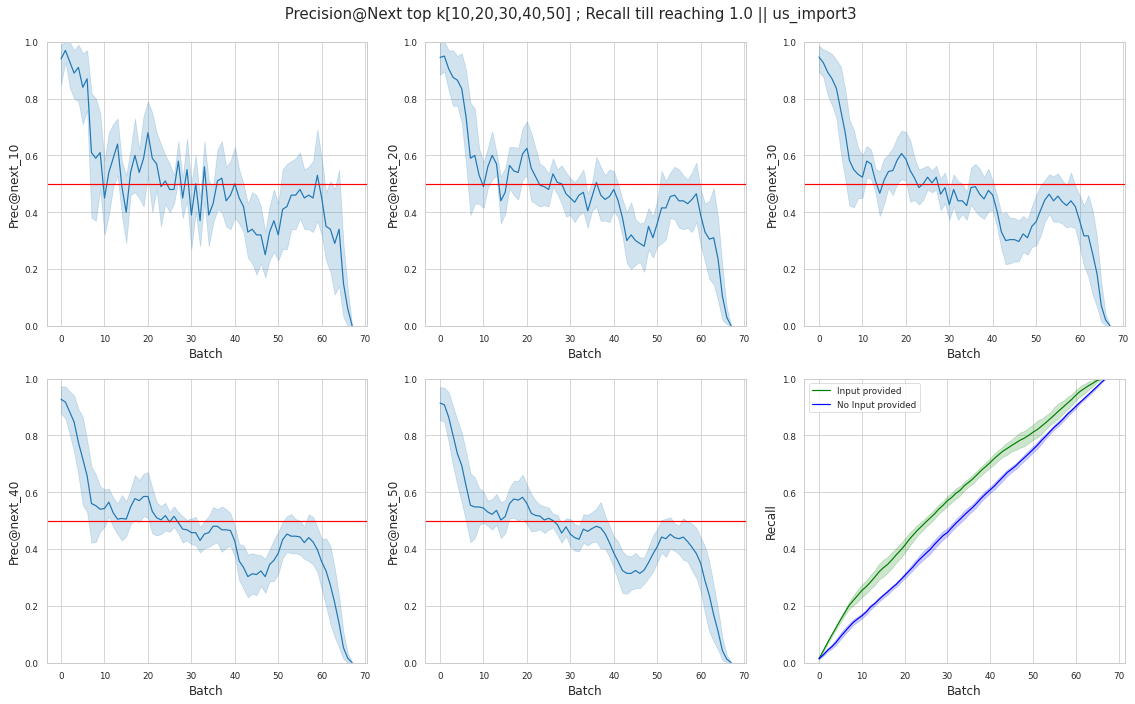

In [24]:
for d in ['us_import'+str(_) for _ in [3]]:
    viz(d)